In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Settings for better visuals
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="coolwarm")

In [3]:
path = '/content/drive/MyDrive/Datasets/Features_For_Traditional_ML_Techniques.csv'
df = pd.read_csv(path)
print(f"Shape: {df.shape}")


Shape: (134198, 64)


In [4]:
df.head()

,Unnamed: 0,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,following,embeddings,BotScore,BotScoreBinary,cred,normalize_influence,mentions,quotes,replies,retweets,favourites,hashtags,URLs,unique_count,total_count,ORG_percentage,NORP_percentage,GPE_percentage,PERSON_percentage,MONEY_percentage,DATE_percentage,CARDINAL_percentage,PERCENT_percentage,ORDINAL_percentage,FAC_percentage,LAW_percentage,PRODUCT_percentage,EVENT_percentage,TIME_percentage,LOC_percentage,WORK_OF_ART_percentage,QUANTITY_percentage,LANGUAGE_percentage,Word count,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,adverbs,adpositions,pronouns,TOs,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,0,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.540794,0.104602,1.0,1.0,1.0,3.0,10.0,0.0,1.0,5,6,0.333333,0.166667,0.166667,0.166667,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42,14,1,5.476190,1,1,1,0,4,1,0,0,0,5,0,1,0,33,3,5,19
1,1,True,End of eviction moratorium means millions of A...,1.0,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.462177,0.094436,3.0,0.0,0.0,0.0,1.0,0.0,1.0,2,4,0.000000,0.250000,0.000000,0.750000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51,15,1,4.627451,7,2,2,0,5,8,2,0,2,1,0,0,0,14,0,2,34
2,2,True,End of eviction moratorium means millions of A...,1.0,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]],0.03,0.0,0.096774,0.039846,0.0,2.0,5.0,0.0,0.0,0.0,1.0,1,1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,16,1,6.038462,0,0,7,3,1,0,1,0,1,0,0,0,0,3,0,4,10
3,3,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.540794,0.104602,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,6,0.000000,0.333333,0.000000,0.166667,0.166667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49,10,2,4.653061,4,6,3,2,7,1,1,0,1,3,0,0,1,6,8,1,30
4,4,True,End of eviction moratorium means millions of A...,1.0,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.296610,0.061135,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3,3,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,12,1,5.121212,2,2,2,3,2,2,0,0,1,3,0,1,0,11,3,2,19


In [5]:
print("\n--- Data Info ---")
df.info()


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134198 entries, 0 to 134197
Data columns (total 64 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              134198 non-null  int64  
 1   majority_target         134198 non-null  bool   
 2   statement               134198 non-null  object 
 3   BinaryNumTarget         134198 non-null  float64
 4   tweet                   134198 non-null  object 
 5   followers_count         134198 non-null  float64
 6   friends_count           134198 non-null  float64
 7   favourites_count        134198 non-null  float64
 8   statuses_count          134198 non-null  float64
 9   listed_count            134198 non-null  float64
 10  following               134198 non-null  float64
 11  embeddings              134198 non-null  object 
 12  BotScore                134198 non-null  float64
 13  BotScoreBinary          134198 non-null  float64
 14  c

In [8]:
df.describe()

,Unnamed: 0,BinaryNumTarget,followers_count,friends_count,favourites_count,statuses_count,listed_count,following,BotScore,BotScoreBinary,cred,normalize_influence,mentions,quotes,replies,retweets,favourites,hashtags,URLs,unique_count,total_count,ORG_percentage,NORP_percentage,GPE_percentage,PERSON_percentage,MONEY_percentage,DATE_percentage,CARDINAL_percentage,PERCENT_percentage,ORDINAL_percentage,FAC_percentage,LAW_percentage,PRODUCT_percentage,EVENT_percentage,TIME_percentage,LOC_percentage,WORK_OF_ART_percentage,QUANTITY_percentage,LANGUAGE_percentage,Word count,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,adverbs,adpositions,pronouns,TOs,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
count,134198.00000,134198.000000,1.341980e+05,134198.000000,1.341980e+05,1.341980e+05,134198.000000,134198.0,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.00000,134198.000000,134198.000000,134198.000000,134198.00000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000
mean,67098.50000,0.513644,1.129308e+04,1893.454455,3.298123e+04,3.419576e+04,73.300198,0.0,0.059106,0.032355,0.405852,0.077665,1.388918,0.573406,1.914201,6.674354,27.572386,0.104726,0.737701,2.365624,3.441229,0.199964,0.067412,0.136151,0.221930,0.029525,0.102339,0.091104,0.030638,0.012432,0.003352,0.005265,0.006839,0.002607,0.005662,0.009771,0.008517,0.002396,0.001011,35.077691,13.062043,1.399857,5.056648,2.452354,1.81221,3.034308,1.575873,3.619644,1.49582,0.788626,0.135583,1.003495,2.366116,0.259408,0.307151,0.121537,12.831905,3.559494,2.249557,21.438658
std,38739.77005,0.499816,4.374971e+05,6997.695671,6.878021e+04,7.510120e+04,1083.274277,0.0,0.167819,0.176942,0.239223,0.026184,1.471604,28.436726,122.041183,406.542579,1831.425703,0.458687,0.439886,1.351617,2.479373,0.276376,0.165502,0.242561,0.298133,0.106880,0.206059,0.190366,0.116949,0.070884,0.037525,0.048690,0.053513,0.032400,0.046830,0.070224,0.062580,0.030757,0.019590,13.604442,3.044782,2.795407,0.825737,2.049247,1.73699,2.012125,1.546382,2.195625,1.63947,0.961242,0.379235,1.086844,2.140459,0.903957,0.774367,0.453865,15.557524,6.674458,2.912136,9.625147
min,0.00000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33549.25000,0.000000,7.000000e+01,168.000000,1.356000e+03,3.046000e+03,0.000000,0.0,0.030000,0.000000,0.223684,0.061814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,11.000000,1.000000,4.571429,1.000000,0.00000,2.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,14.000000
50%,67098.50000,1.000000,3.540000e+02,567.000000,8.377000e+03,1.101900e+04,2.000000,0.0,0.030000,0.000000,0.386691,0.079436,1.00

In [9]:
print("\nValue counts for BinaryNumTarget (Fake/Real):")
print(df['BinaryNumTarget'].value_counts())

print("\nValue counts for BotScoreBinary (Bot/Human):")
print(df['BotScoreBinary'].value_counts())



Value counts for BinaryNumTarget (Fake/Real):
BinaryNumTarget
1.0    68930
0.0    65268
Name: count, dtype: int64

Value counts for BotScoreBinary (Bot/Human):
BotScoreBinary
0.0    129856
1.0      4342
Name: count, dtype: int64


In [10]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [11]:
print("\nUnique values per key column:")
for col in ['BinaryNumTarget', 'BotScoreBinary']:
    print(f"{col}: {df[col].unique()}")



Unique values per key column:
BinaryNumTarget: [1. 0.]
BotScoreBinary: [0. 1.]


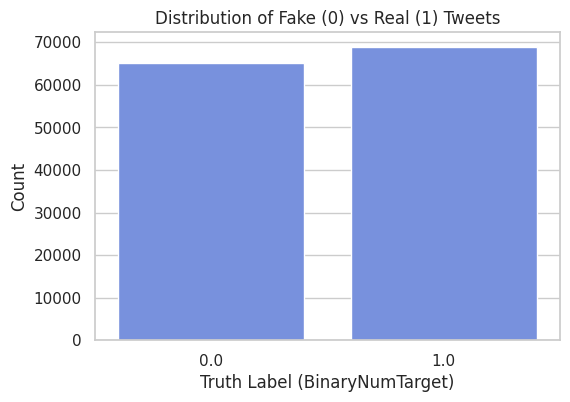

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='BinaryNumTarget', data=df)
plt.title('Distribution of Fake (0) vs Real (1) Tweets')
plt.xlabel('Truth Label (BinaryNumTarget)')
plt.ylabel('Count')
plt.show()

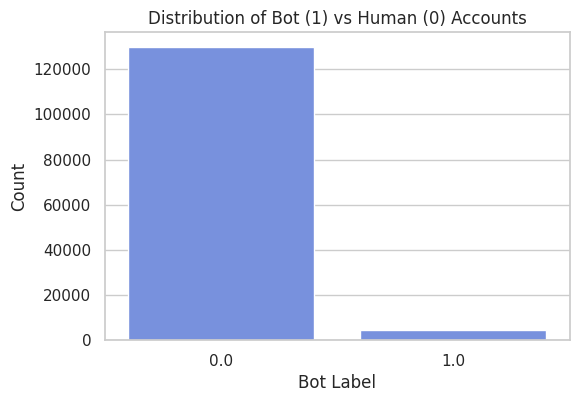

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='BotScoreBinary', data=df)
plt.title('Distribution of Bot (1) vs Human (0) Accounts')
plt.xlabel('Bot Label')
plt.ylabel('Count')
plt.show()

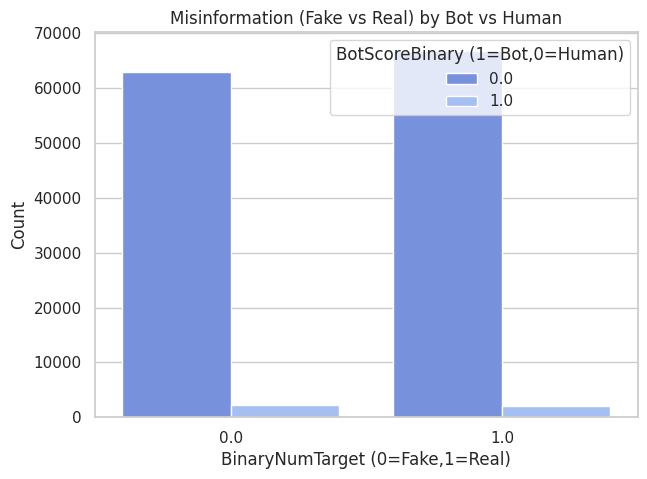

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(x='BinaryNumTarget', hue='BotScoreBinary', data=df)
plt.title('Misinformation (Fake vs Real) by Bot vs Human')
plt.xlabel('BinaryNumTarget (0=Fake,1=Real)')
plt.ylabel('Count')
plt.legend(title='BotScoreBinary (1=Bot,0=Human)')
plt.show()

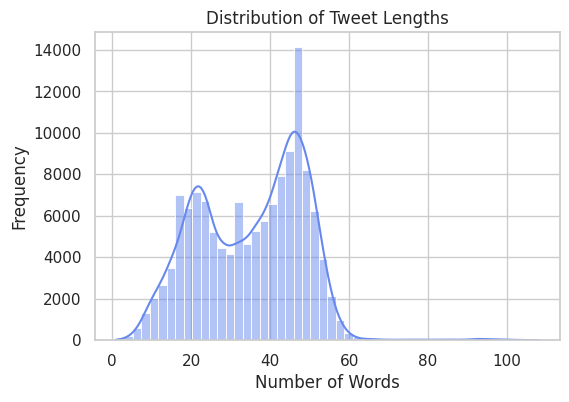

In [15]:
df['tweet_length'] = df['tweet'].astype(str).apply(lambda x: len(x.split()))
plt.figure(figsize=(6,4))
sns.histplot(df['tweet_length'], bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


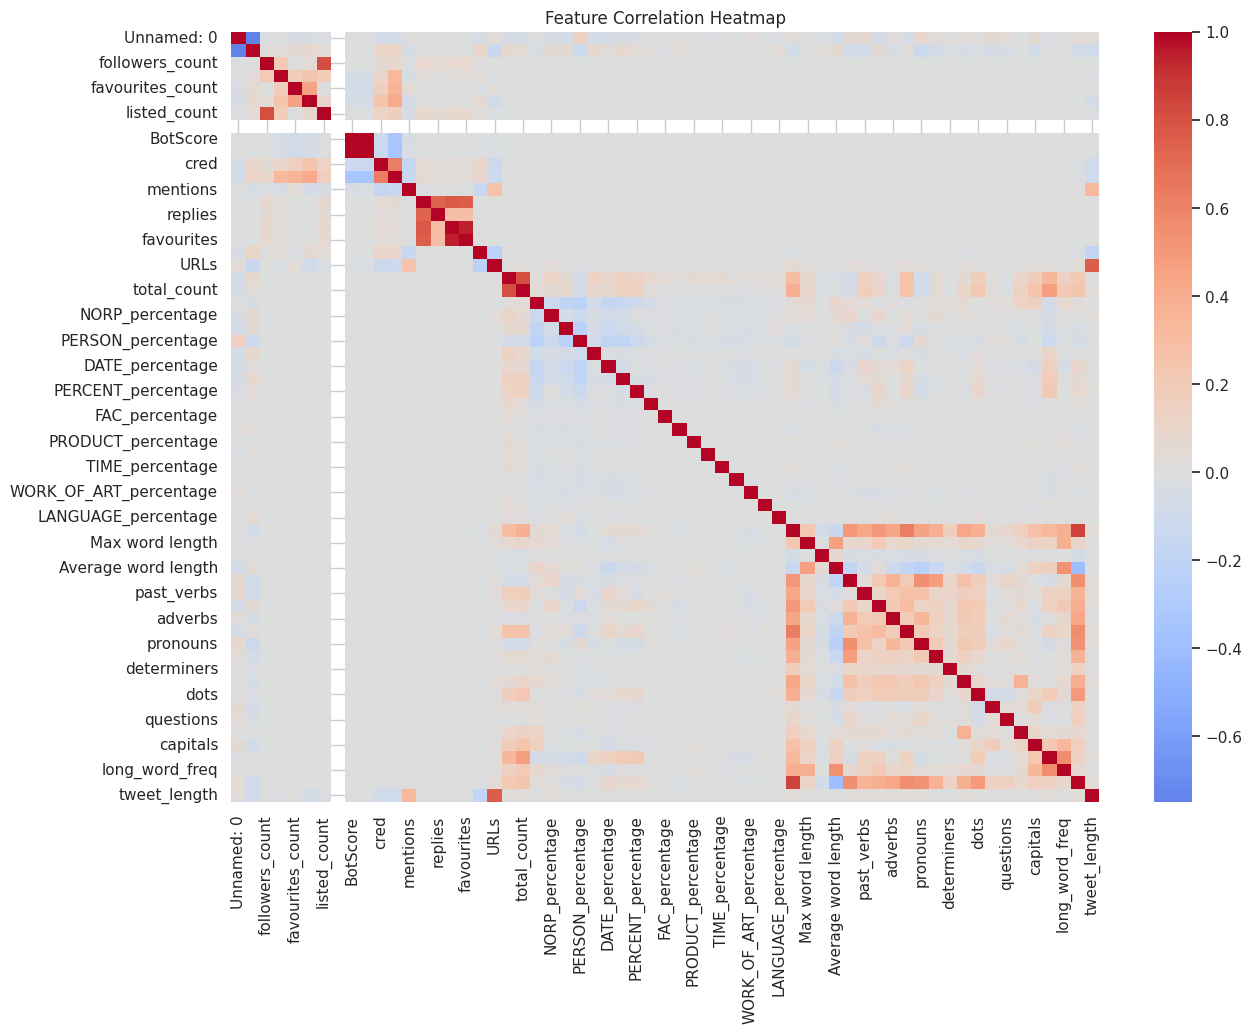

In [17]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()
